In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Introduction to Python Imaging Library(PIL)

In [27]:
pip install pillow

2.1 Exercise - 1:

Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [29]:
image= Image.open('/content/drive/MyDrive/AI- 6CS012/Week-1/lenna_image.png')

In [30]:
print("Format:", image.format)
print("Mode:", image.mode)
print("Size:", image.size)

Format: PNG
Mode: RGBA
Size: (366, 357)


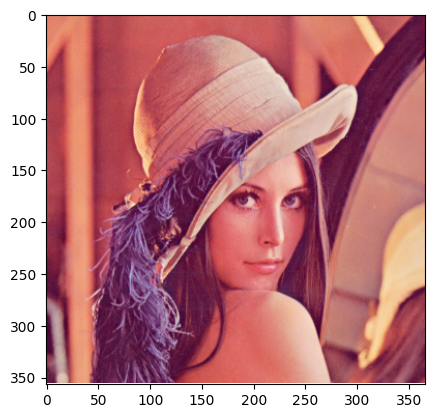

In [31]:
plt.imshow(image)
plt.show()

2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

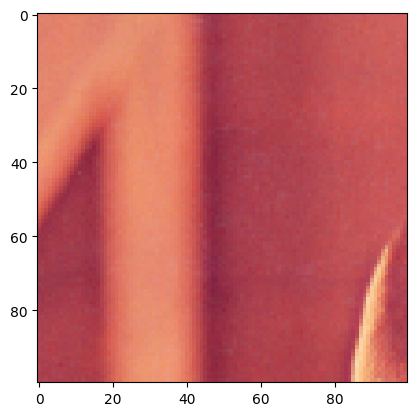

In [32]:
image_array= np.array(image)
top_left= image_array[:100,:100]
plt.imshow(top_left)
plt.show()

3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

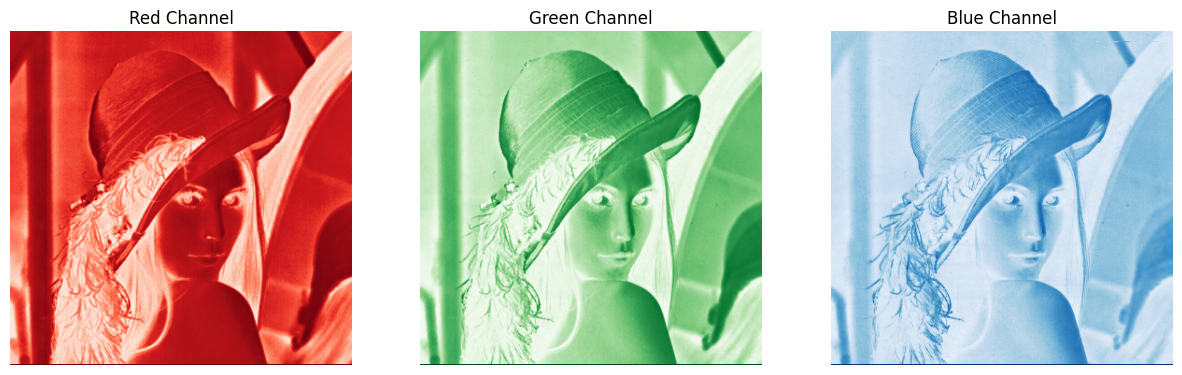

In [33]:
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Red channel
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[0].axis('off')

# Green channel
axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[1].axis('off')

# Blue channel
axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
axs[2].axis('off')

plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

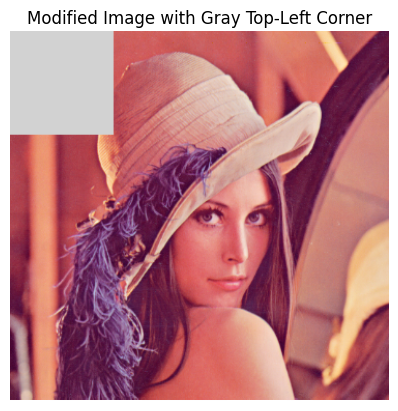

In [34]:
image_array[:100, :100,:3] = [210, 210, 210]

plt.imshow(image_array)
plt.axis("off")
plt.title("Modified Image with Gray Top-Left Corner")
plt.show()

# 2.2 Exercise - 2:

1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

In [35]:
grey_image= Image.open('/content/drive/MyDrive/AI- 6CS012/Week-1/camera_man.jpg').convert('L')

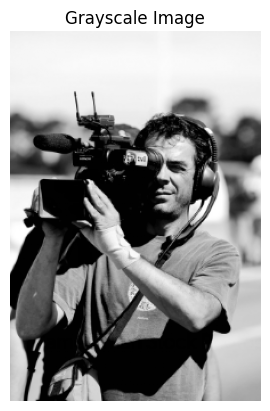

In [36]:
plt.imshow(grey_image, cmap="gray")
plt.axis("off")  # Hide axes
plt.title("Grayscale Image")
plt.show()

2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

In [37]:
grey_image_array= np.array(grey_image)
print("Image Shape:", grey_image_array.shape)

Image Shape: (325, 220)


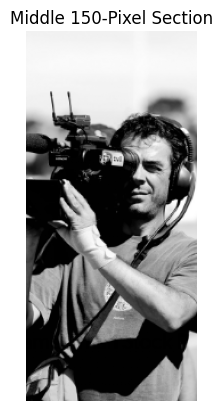

In [38]:
height, width = grey_image_array.shape
start_x = (width // 2) - 75
end_x = (width // 2) + 75
cropped_section = grey_image_array[:, start_x:end_x]

plt.imshow(cropped_section, cmap="gray")
plt.axis("off")  # Hide axes
plt.title("Middle 150-Pixel Section")
plt.show()

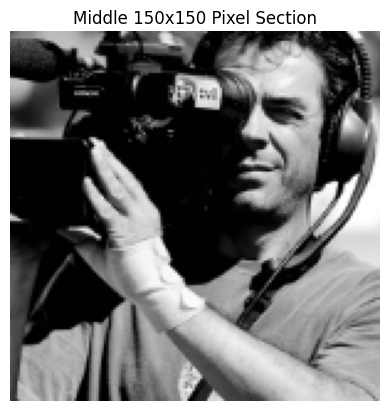

In [39]:
height, width = grey_image_array.shape
square_size = 150
start_y = (height - square_size) // 2
start_x = (width - square_size) // 2
cropped_section = grey_image_array[start_y:start_y + square_size, start_x:start_x + square_size]

plt.imshow(cropped_section, cmap="gray")
plt.axis("off")
plt.title("Middle 150x150 Pixel Section")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).

• Display the resulting binary image.

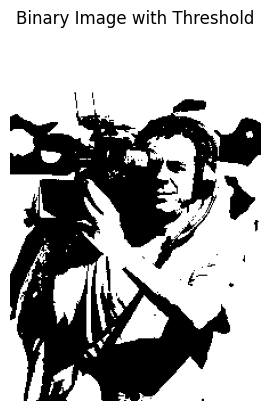

In [40]:
binary_image = np.where(grey_image_array < 100, 0, 255)
plt.imshow(binary_image, cmap="gray")
plt.axis("off")  # Hide axes
plt.title("Binary Image with Threshold")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.


Text(0.5, 1.0, 'Rotated (Pillow)')

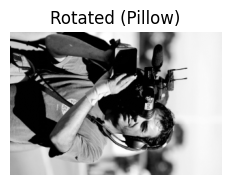

In [41]:
rotated_image_pillow = grey_image.rotate(-90, expand=True)
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(rotated_image_pillow, cmap="gray")
plt.axis("off")
plt.title("Rotated (Pillow)")

Text(0.5, 1.0, 'Rotated (NumPy)')

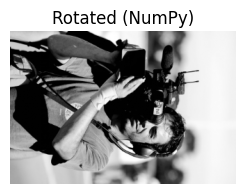

In [42]:
grey_image_array = np.array(grey_image)
rotated_image_array = np.rot90(grey_image_array, k=-1)
plt.subplot(1, 2, 2)
plt.imshow(rotated_image_array, cmap="gray")
plt.axis("off")
plt.title("Rotated (NumPy)")

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.


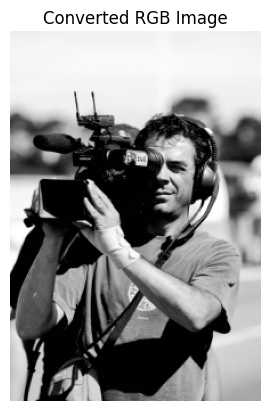

In [43]:
rgb_image_array = np.stack([grey_image_array] * 3, axis=-1)

rgb_image = Image.fromarray(rgb_image_array)

plt.imshow(rgb_image)
plt.axis("off")  # Hide axes
plt.title("Converted RGB Image")
plt.show()

# 3 Image Compression and Decompression using PCA.

1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.

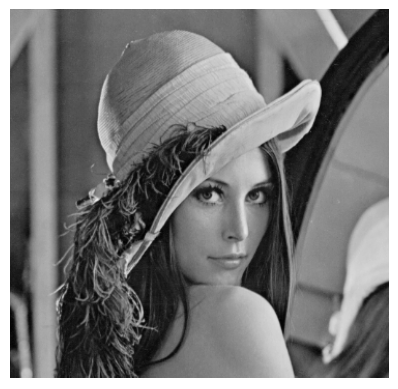

In [44]:
image_path = "/content/drive/MyDrive/AI- 6CS012/Week-1/lenna_image.png"
image_gray = image.convert('L')

plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

image_array = np.array(image_gray)

mean = np.mean(image_array, axis=0)
centered_data = image_array - mean

std_deviation = np.std(centered_data, axis=0)
standardized_data = centered_data / std_deviation

cov_matrix = np.cov(standardized_data.T)

2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.

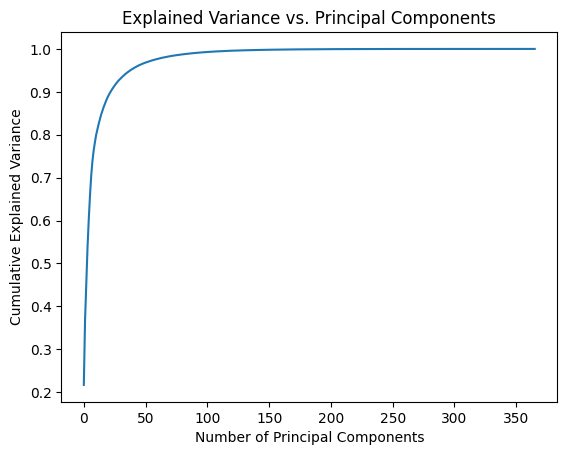

In [45]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

k = 50
principal_components = sorted_eigenvectors[:, :k]

explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance)

plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Principal Components')
plt.show()

3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.


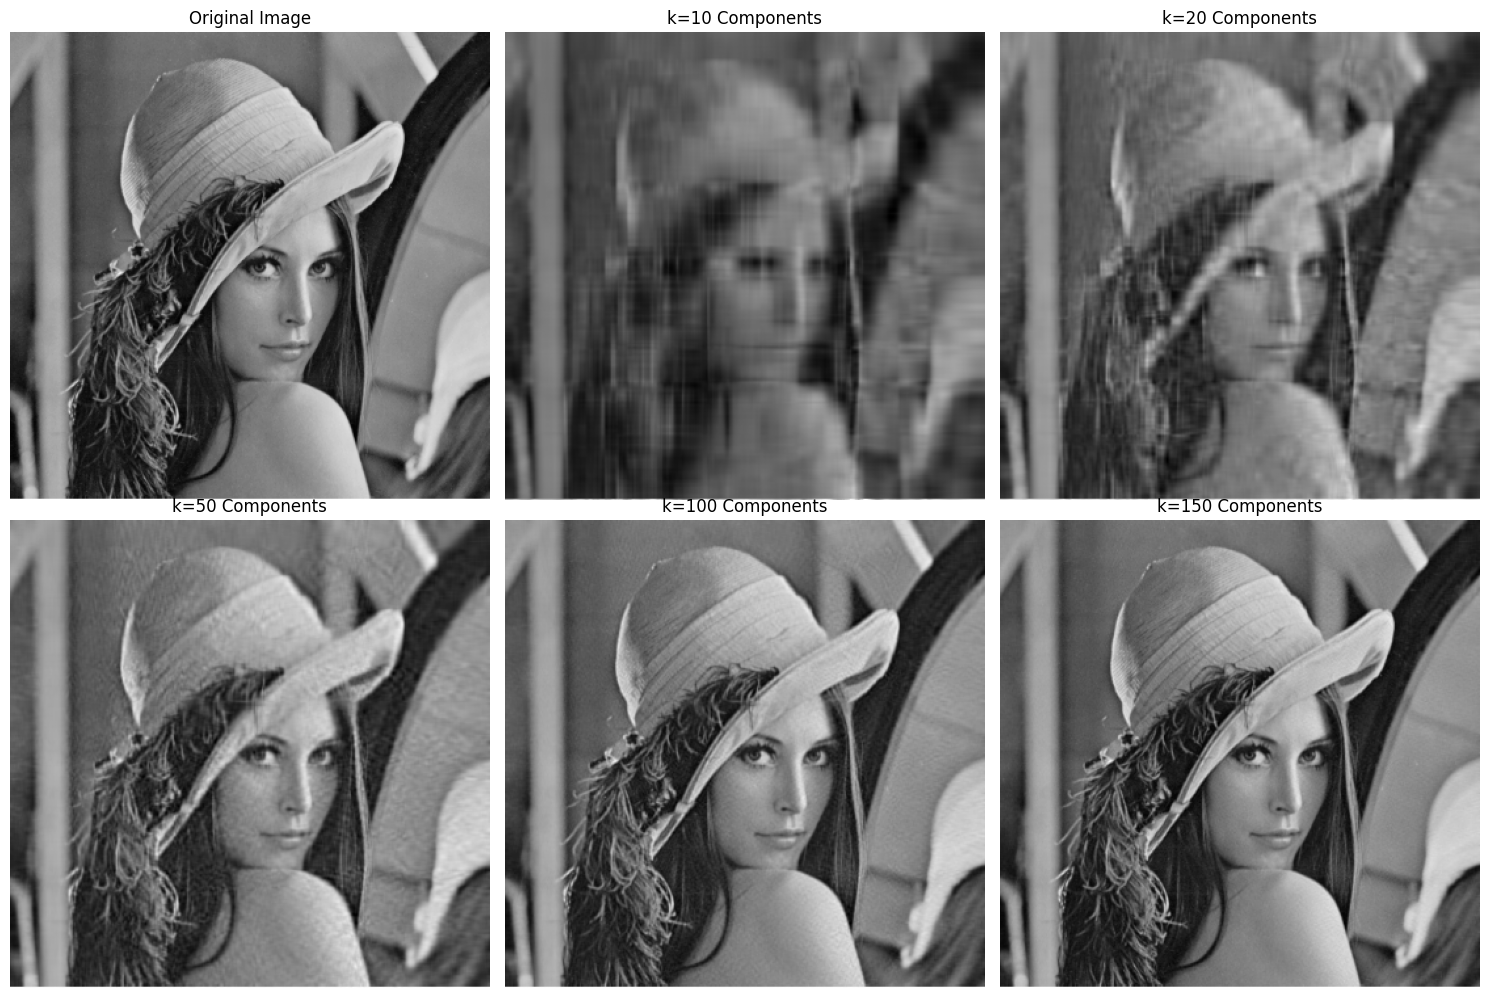

In [46]:
ks = [10, 20, 50, 100, 150]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].imshow(image_array, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

for i, k in enumerate(ks):
    principal_components_k = sorted_eigenvectors[:, :k]
    projected_data_k = np.dot(standardized_data, principal_components_k)
    reconstructed_data_k = np.dot(projected_data_k, principal_components_k.T)
    reconstructed_data_k = (reconstructed_data_k * std_deviation) + mean

    row = (i + 1) // 3
    col = (i + 1) % 3

    axs[row, col].imshow(reconstructed_data_k, cmap='gray')
    axs[row, col].set_title(f'k={k} Components')
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()
